In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [2]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)


['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title.akas.tsv.gz',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [3]:
with open('/Users/caill/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()



dict_keys(['client-id', 'api-key'])

In [4]:
tmdb.API_KEY =  login['api-key']

In [5]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)


In [6]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celiao/tmbdsimple"""
    #Get the movie object for the current ID
    movie = tmdb.Movies(movie_id)
    
    #Saving the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    #Looping through countries in releases
    for c in releases["countries"]:
        #if the country abbreviation == US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            info['certification'] = c['certification']
    return info

In [7]:
test = get_movie_with_rating("tt0848228") # movie id: tt0848228 ("The Avengers")
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 135.735,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [8]:
test2 = get_movie_with_rating("tt0332280") # movie id: tt0332280 ("The Notebook")
test2

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 62.31,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/5ThIuO93vsk47oexKTSdfKEr7EC.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 260

In [9]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('data/title_basics.csv.gz')
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81624 entries, 0 to 81623
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          81624 non-null  object 
 1   titleType       81624 non-null  object 
 2   primaryTitle    81624 non-null  object 
 3   originalTitle   81624 non-null  object 
 4   isAdult         81624 non-null  int64  
 5   startYear       81624 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  81624 non-null  int64  
 8   genres          81624 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [10]:
# Filter years
YEARS_TO_GET = [2000,2001]

In [11]:
errors = [ ]

In [12]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    
    # If it does not exist: create it
    if file_exists == False:
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
            
        #Saving new year as the current df
        df = basics.loc[basics['startYear']==YEAR].copy()
            
        # saving movie ids to list
        movie_ids = df['tconst'].copy()
            
        # Load existing data from json into a dataframe called "previous_df"
        previous_df = pd.read_json(JSON_FILE)
            
        # filter out any ids that are already in the JSON_FILE
        movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
            

        #Get index and movie id from list
        # INNER Loop
        for movie_id in tqdm_notebook(movie_ids_to_get,
                                          desc=f'Movies from {YEAR}',
                                          position=1,
                                          leave=True):
            try:
                # Retrieve then data for the movie id
                temp = get_movie_with_rating(movie_id)  
                # Append/extend results to existing file using a pre-made function
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server
                time.sleep(0.02)

            except Exception as e:
                errors.append([movie_id, e])



        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
print(f"- Total errors: {len(errors)}")

- Total errors: 0


# EDA

In [14]:
year_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
year_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

In [18]:
df1 = pd.concat([year_2000, year_2001], axis= 0).dropna()
df_r_b = (df1["revenue"].copy() > 0) & (df1["budget"].copy() > 0)
df = df1[df_r_b]
print(df["revenue"].value_counts())
print(df["budget"].value_counts())

296339527.0    1
186053725.0    1
33788161.0     1
18492362.0     1
976475550.0    1
450717150.0    1
93375151.0     1
207283925.0    1
23619609.0     1
53187659.0     1
579707738.0    1
487853320.0    1
871368364.0    1
68411275.0     1
90449929.0     1
264105545.0    1
59217789.0     1
Name: revenue, dtype: int64
60000000.0     2
75000000.0     1
23000000.0     1
92000000.0     1
28000000.0     1
16000000.0     1
93000000.0     1
115000000.0    1
30000000.0     1
120000000.0    1
38000000.0     1
85000000.0     1
125000000.0    1
1200000.0      1
22000000.0     1
10000000.0     1
Name: budget, dtype: int64


280026281.11764705

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 18 to 567
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                17 non-null     object 
 1   adult                  17 non-null     float64
 2   backdrop_path          17 non-null     object 
 3   belongs_to_collection  17 non-null     object 
 4   budget                 17 non-null     float64
 5   genres                 17 non-null     object 
 6   homepage               17 non-null     object 
 7   id                     17 non-null     float64
 8   original_language      17 non-null     object 
 9   original_title         17 non-null     object 
 10  overview               17 non-null     object 
 11  popularity             17 non-null     float64
 12  poster_path            17 non-null     object 
 13  production_companies   17 non-null     object 
 14  production_countries   17 non-null     object 
 15  releas

C:\Users\caill\AppData\Local\Temp\ipykernel_27624\1465397166.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=df, x='revenue', y='title', ci = 68)


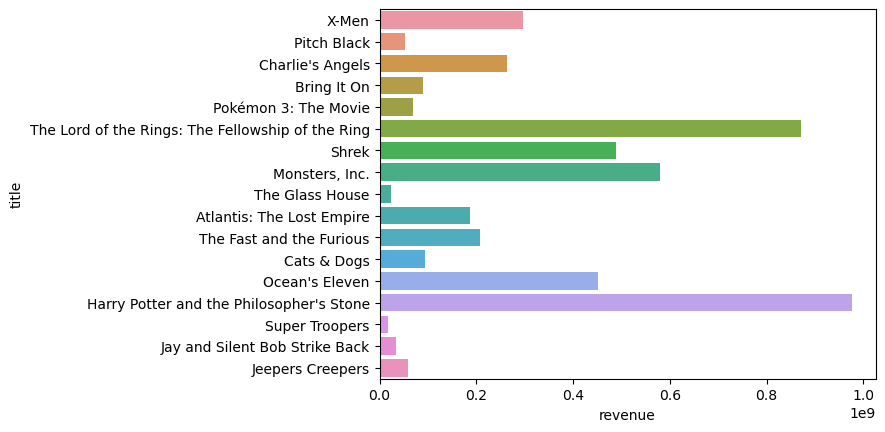

In [22]:
import seaborn as sns
# How many movies had at least some valid financial information
ax = sns.barplot(data=df, x='revenue', y='title', ci = 68)

In [23]:
df["certification"].value_counts()

PG-13    7
R        4
PG       4
G        2
Name: certification, dtype: int64

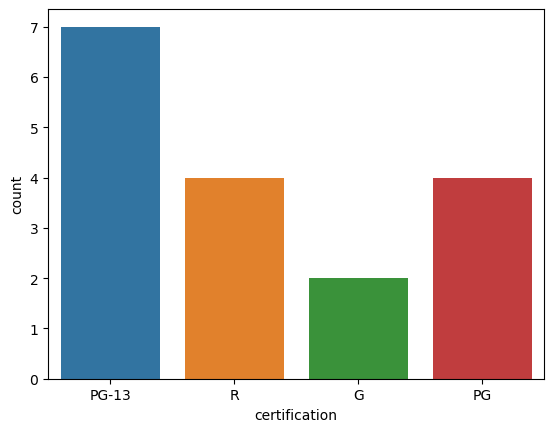

In [24]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)?
sns.countplot(data=df, x= "certification");


In [44]:
# What is the average revenue per certification category?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
avg_rev = df.groupby("certification")["revenue"].mean()
avg_rev.head()

certification
G       324059506.50
PG      435939436.50
PG-13   314840578.43
R        41171492.75
Name: revenue, dtype: float64

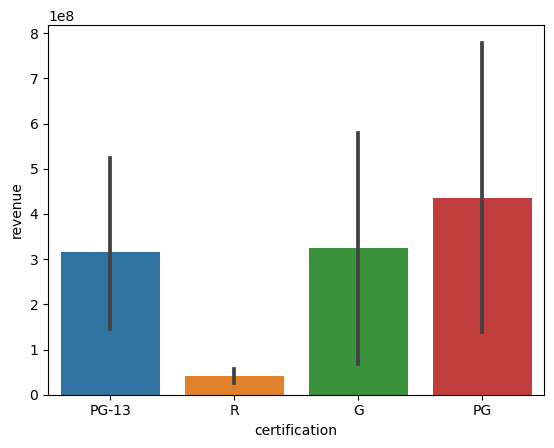

In [45]:
sns.barplot(data=df, x = "certification", y= "revenue" );

In [36]:
# What is the average budget per certification category?
avg_bud = df.groupby("certification")["budget"].mean()
avg_bud

certification
G        65500000.0
PG       91250000.0
PG-13    63000000.0
R        14050000.0
Name: budget, dtype: float64

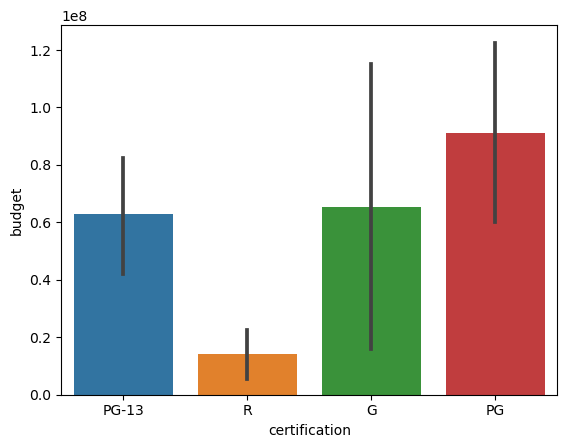

In [46]:
sns.barplot(data=df, x = "certification", y= "budget" );